In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.tree import *
from sklearn.ensemble import *
from numpy import random
from sklearn.preprocessing import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import *
from tensorflow.keras.applications import *
import warnings
warnings.filterwarnings("ignore")
from keras.datasets import cifar10
from tensorflow.keras.preprocessing import image_dataset_from_directory

2024-11-28 21:39:32.193585: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-28 21:39:32.193748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-28 21:39:32.351467: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Fashion MNIST

In [2]:
df=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7638 - loss: 0.6856 - val_accuracy: 0.8440 - val_loss: 0.4213
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8535 - loss: 0.4029 - val_accuracy: 0.8660 - val_loss: 0.3632
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8727 - loss: 0.3470 - val_accuracy: 0.8697 - val_loss: 0.3571
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8776 - loss: 0.3295 - val_accuracy: 0.8715 - val_loss: 0.3574
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8840 - loss: 0.3133 - val_accuracy: 0.8768 - val_loss: 0.3361
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8923 - loss: 0.2915 - val_accuracy: 0.8809 - val_loss: 0.3327
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8976 - loss: 0.2779 - val_accuracy: 0.8777 - val_loss: 0.3330
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8994 - loss: 0.2714 - 

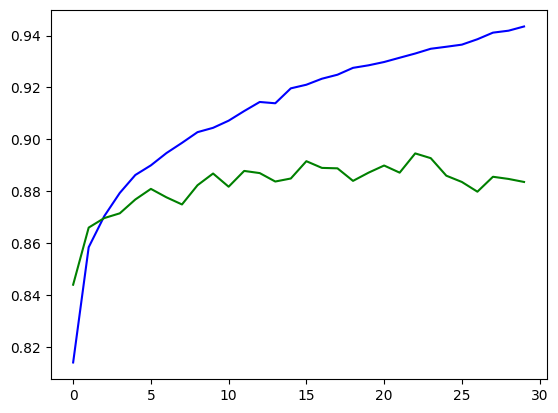

In [3]:
y = df['label'].values
X= df.drop(['label' ] , axis=1).values


scaler=MinMaxScaler()
X= scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = Sequential()

model.add(Dense(100, activation='relu'))#couche 1
model.add(Dense(50, activation='relu'))# couche 2
model.add(Dense(10, activation='softmax')) # couche 3 a 25  neurons nb de class ( np.unique(df.label))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy' ])
epochs = 30

history = model.fit(X_train,y_train, validation_data=(X_test,y_test) , epochs=epochs , verbose= 1)

plt.plot(range(epochs), history.history['accuracy'] , c='blue')
plt.plot(range(epochs), history.history['val_accuracy'] , c='green')

y_hat = model.predict(X_test).argmax(axis=1)

print('Accuracy : ', accuracy_score(y_test,y_hat))
print('Classification Report', classification_report(y_test, y_hat))
print('Matrice de confusion', confusion_matrix(y_test,y_hat))

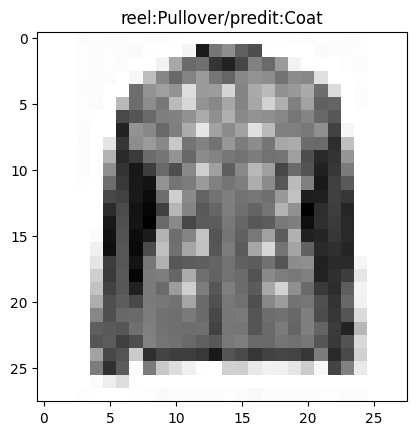

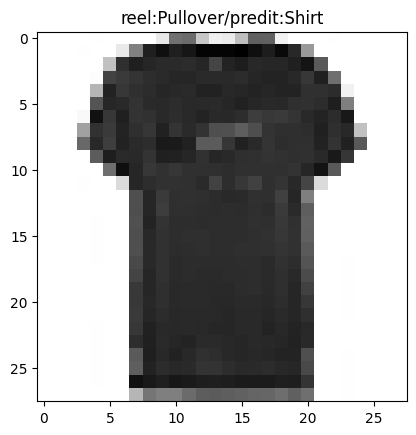

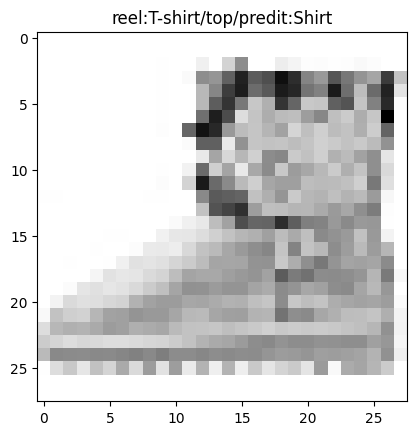

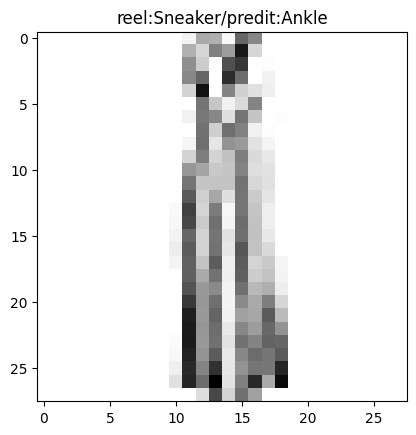

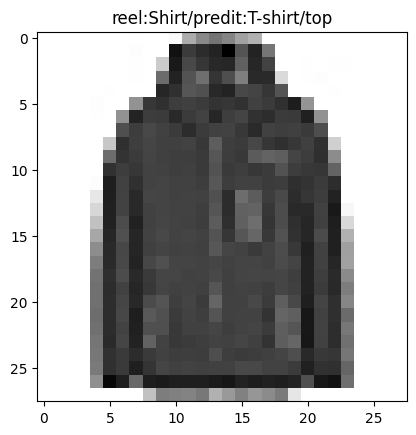

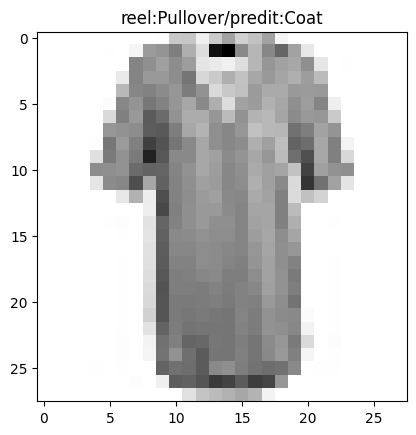

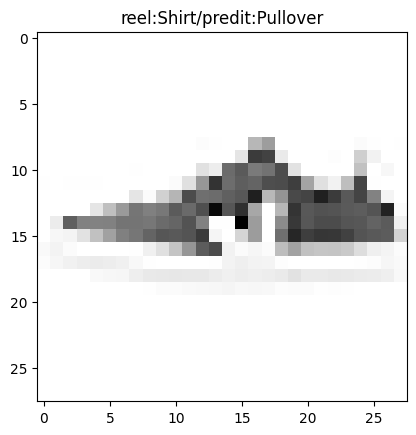

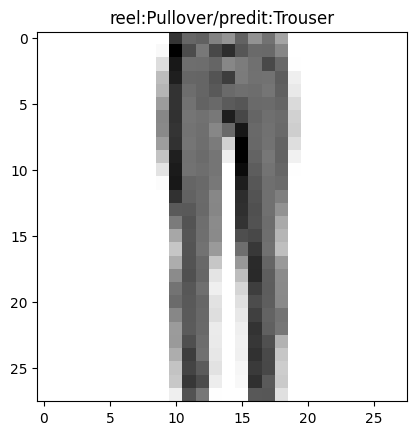

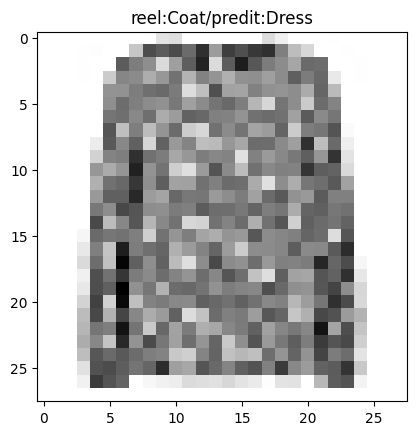

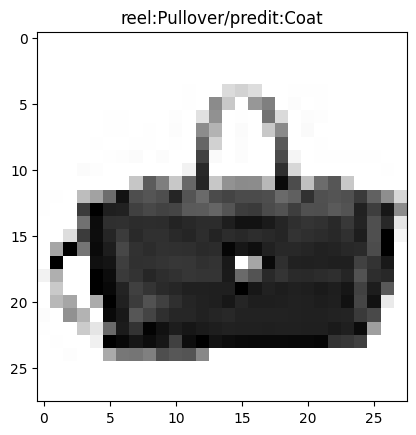

In [4]:
items = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle', 'boot']
i=0
j = 0 
while (j<10):
    if y_hat[i] != y_test[i]:
        plt.imshow(X[i].reshape(28, 28), cmap='Greys')
        plt.title('reel:' + items[y_test[i]]+'/predit:' + items[y_hat[i]])
        plt.show()
        j=j+1
    i=i+1

# Cat and dog

In [5]:
train=image_dataset_from_directory(
    "/kaggle/input/cat-and-dog/training_set/training_set/"
                                   ,image_size=(224,224))
test=image_dataset_from_directory(
    "/kaggle/input/cat-and-dog/test_set/test_set/"
                                  ,image_size=(224,224))

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


Epoch 1/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 179s 706ms/step - accuracy: 0.5698 - loss: 0.6717 - val_accuracy: 0.6723 - val_loss: 0.5883
Epoch 2/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 198s 692ms/step - accuracy: 0.6978 - loss: 0.5738 - val_accuracy: 0.7237 - val_loss: 0.5560
Epoch 3/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 199s 680ms/step - accuracy: 0.7676 - loss: 0.4908 - val_accuracy: 0.7192 - val_loss: 0.5671
Epoch 4/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 177s 705ms/step - accuracy: 0.8061 - loss: 0.4373 - val_accuracy: 0.7558 - val_loss: 0.5491
Epoch 5/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 171s 679ms/step - accuracy: 0.8249 - loss: 0.3916 - val_accuracy: 0.7573 - val_loss: 0.5560
Epoch 6/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 202s 680ms/step - accuracy: 0.8572 - loss: 0.3321 - val_accuracy: 0.7484 - val_loss: 0.5930
Epoch 7/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 172s 684ms/step - accuracy: 0.8760 - loss: 0.3046 - val_accuracy: 0.7217 - val_loss: 0.7511
Epoch 8/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 172s 683ms/step - accuracy: 0.8962 -

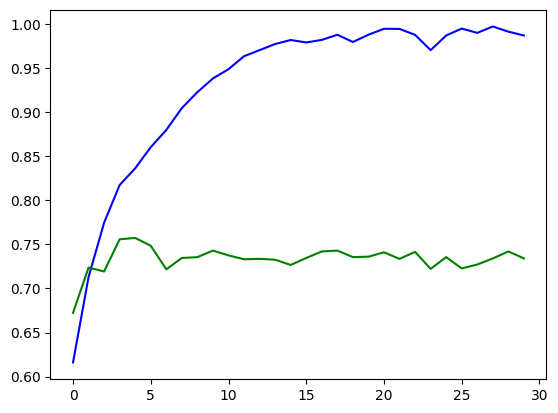

In [6]:
model = Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Rescaling(scale=1./255))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(20, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(20, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs=30
history=model.fit(train,validation_data=(test),
                  epochs=epochs,verbose=1,batch_size=256)
plt.plot(range(epochs), history.history['accuracy'] , c='blue')
plt.plot(range(epochs), history.history['val_accuracy'] , c='green')



In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 20)   │         2,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 20)     │         3,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13520)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │        27,042 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,032 (398.57 KB)

 Trainable params: 34,010 (132.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 68,022 (265.71 KB)

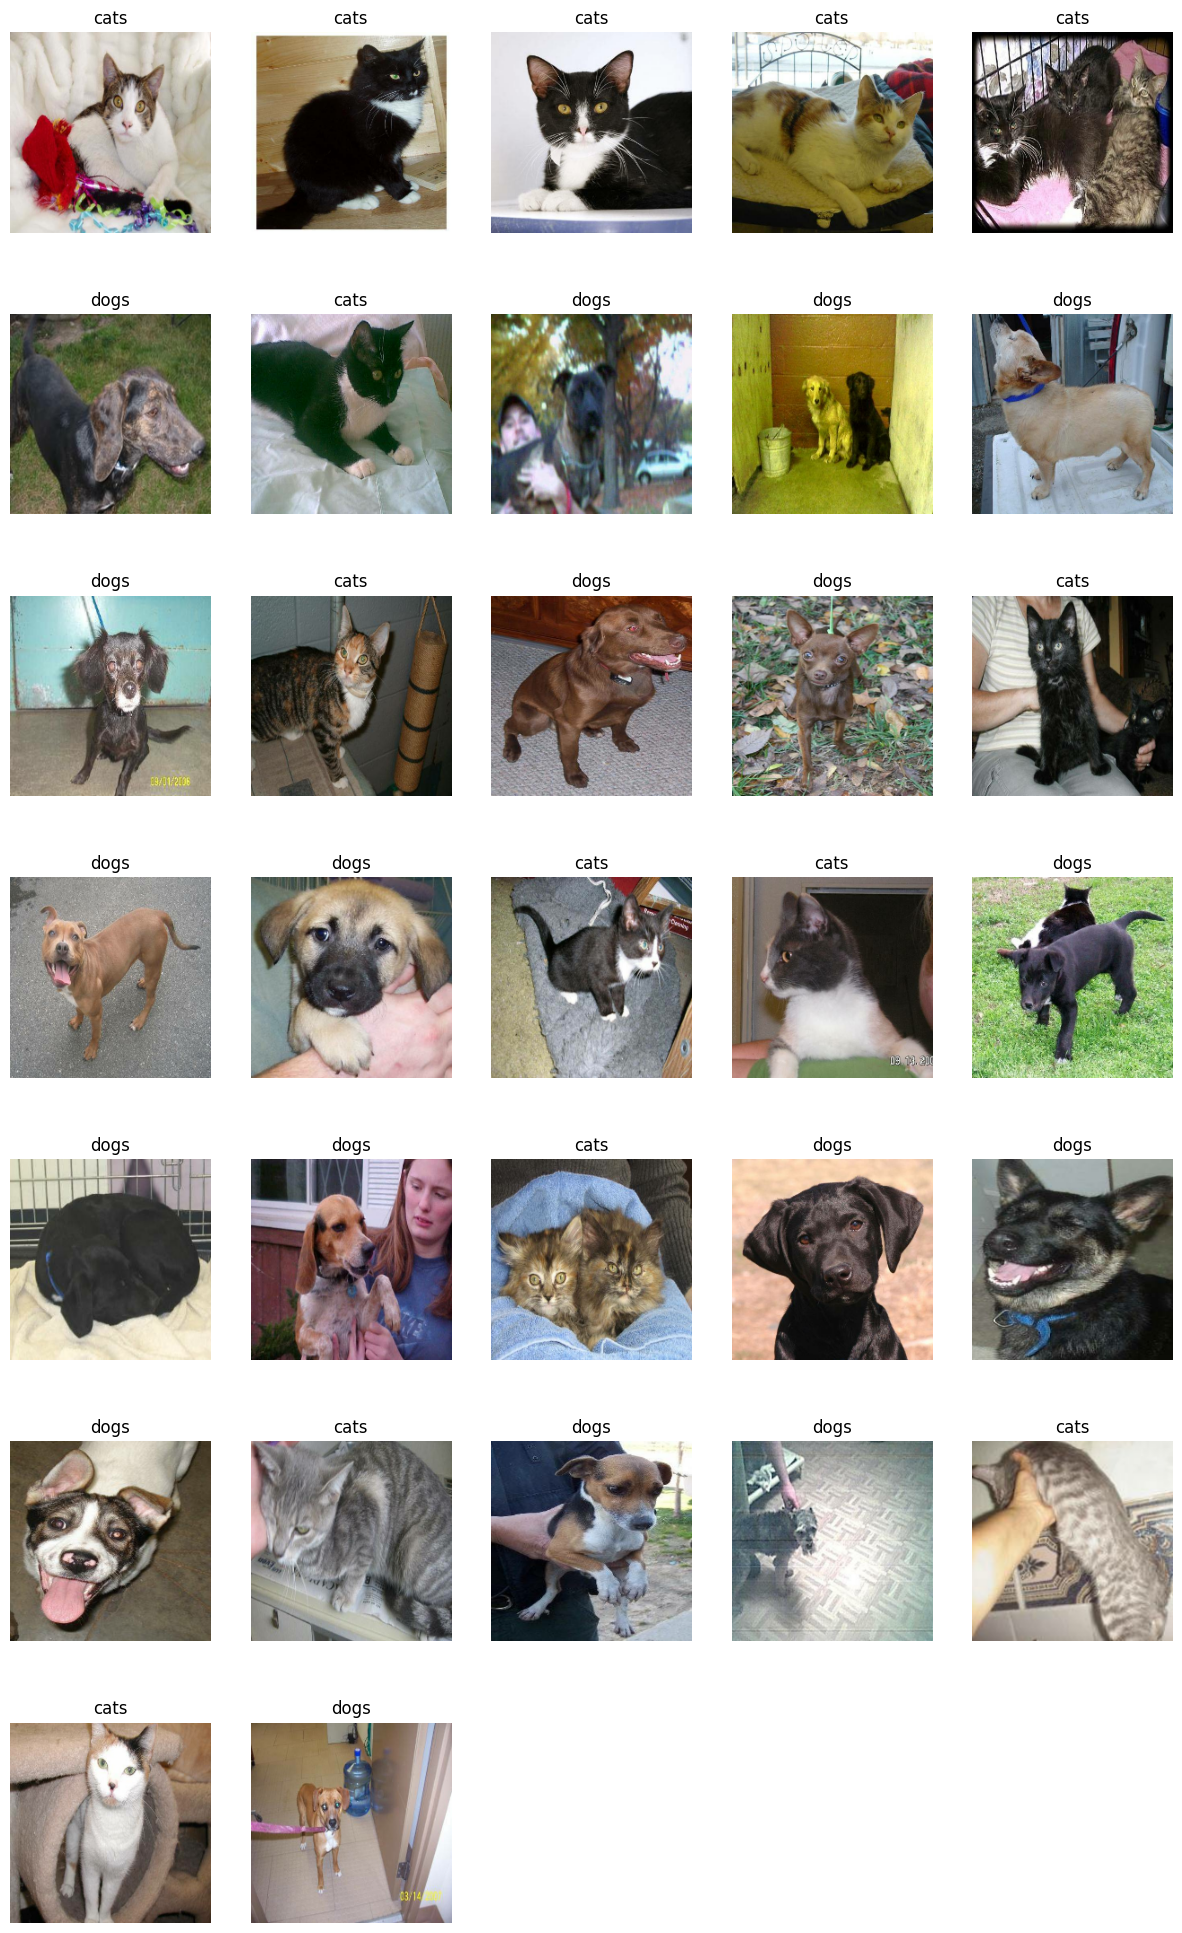

In [8]:
plt.figure(figsize=(15,25))
class_names=train.class_names
for image,labels in train.take(1):
    for i in range(32):
        plt.subplot(7,5,i+1)
        plt.imshow(np.array(image[i]).astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Alien vs predator

In [9]:
train=image_dataset_from_directory(
    "/kaggle/input/alien-vs-predator-images/"
                                   ,image_size=(224,224))
test=image_dataset_from_directory(
    "/kaggle/input/alien-vs-predator-images/"
                                  ,image_size=(224,224))

Found 1788 files belonging to 2 classes.
Found 1788 files belonging to 2 classes.


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 48s 836ms/step - accuracy: 0.4617 - loss: 0.7095 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 82s 842ms/step - accuracy: 0.4903 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 46s 826ms/step - accuracy: 0.4719 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 841ms/step - accuracy: 0.4945 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 46s 822ms/step - accuracy: 0.4661 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 55s 985ms/step - accuracy: 0.5011 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 836ms/step - accuracy: 0.4845 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 832ms/step - accuracy: 0.4856 - loss: 0.6932 - val_accu

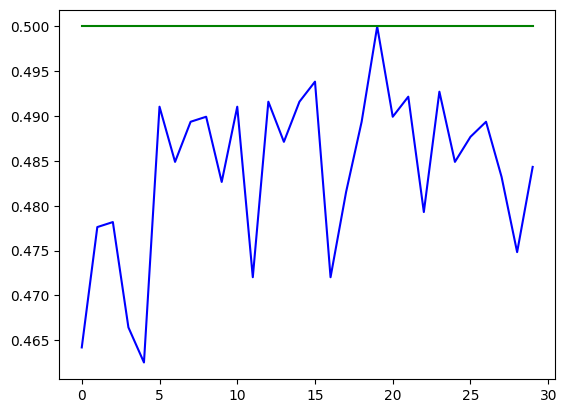

In [10]:
model = Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Rescaling(scale=1./255))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(20, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(20, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs=30
history=model.fit(train,validation_data=(test),
                  epochs=epochs,verbose=1,batch_size=256)
plt.plot(range(epochs), history.history['accuracy'] , c='blue')
plt.plot(range(epochs), history.history['val_accuracy'] , c='green')

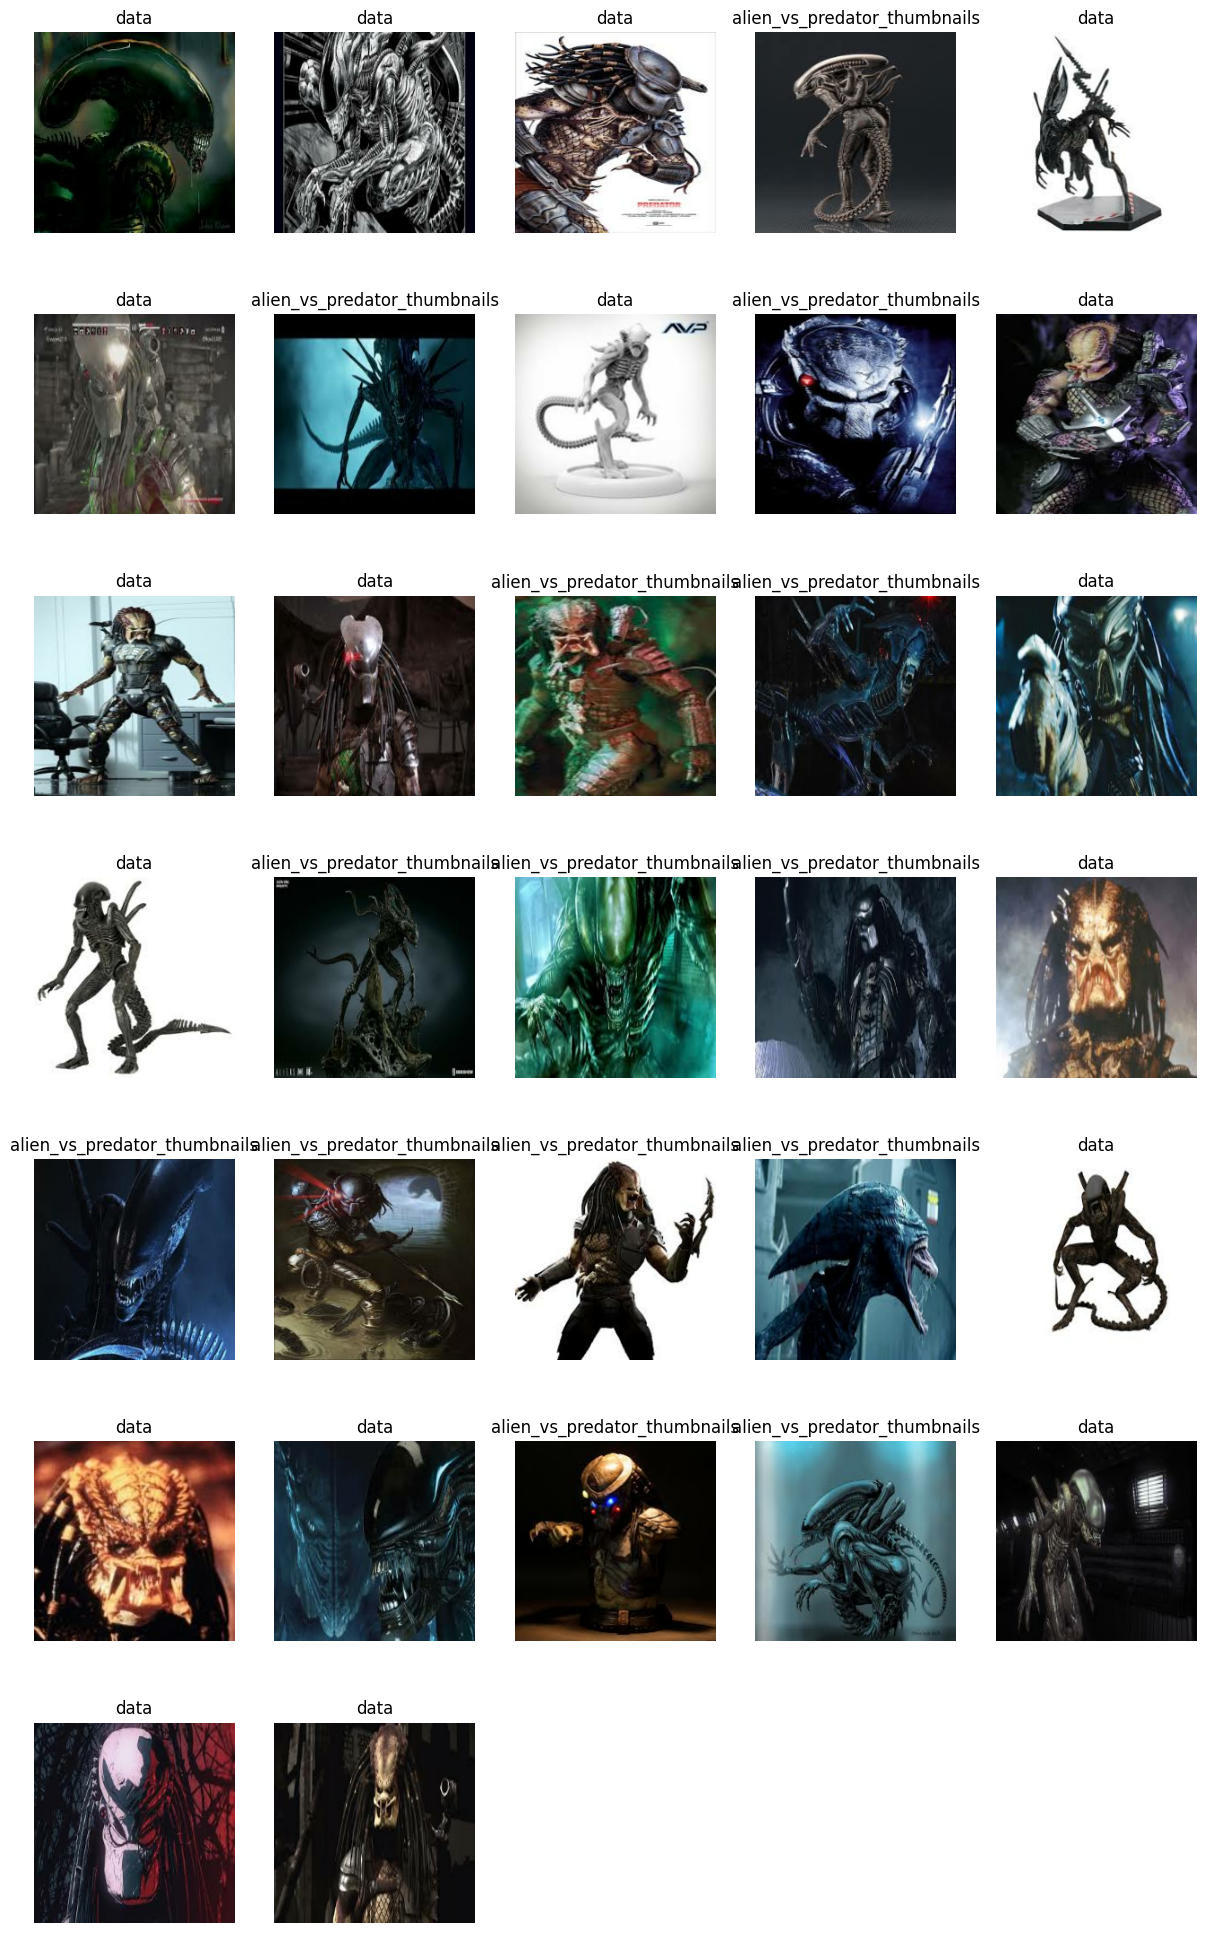

In [11]:
plt.figure(figsize=(15,25))
class_names=train.class_names
for image,labels in train.take(1):
    for i in range(32):
        plt.subplot(7,5,i+1)
        plt.imshow(np.array(image[i]).astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")